In [43]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

In [44]:
import os

In [45]:
img = os.listdir("./moon_lake")
img

['lake1.jpg', 'lake2.jpg', 'lake3.jpg', 'lake4.jpg', 'lake5.jpg', 'lake6.jpg']

In [46]:
images=[]
for i in img:
    images.append(cv2.imread("./moon_lake/"+i))

In [16]:
#Read the images from your directory
left=cv2.imread('tree1d.jpg')
#right=cv2.imread('c.jpg')
middle = cv2.imread('tree2b.jpg')
images=[]
images.append(left)
#images.append(right)
images.append(middle)

In [47]:
#stitcher = cv2.createStitcher()
beg = time.time()
stitcher = cv2.Stitcher.create()
ret,pano = stitcher.stitch(images)
end = time.time()
if ret == 0:
    print("Succeed")
    print(round(end-beg,2),"s")

Succeed
4.06 s


In [48]:
stack= np.hstack(tuple([i for i in images]))

(<matplotlib.axes._subplots.AxesSubplot at 0x2c0819ec7f0>,
 Text(0.5, 1.0, 'Panorama'),
 (-0.5, 2272.5, 905.5, -0.5))

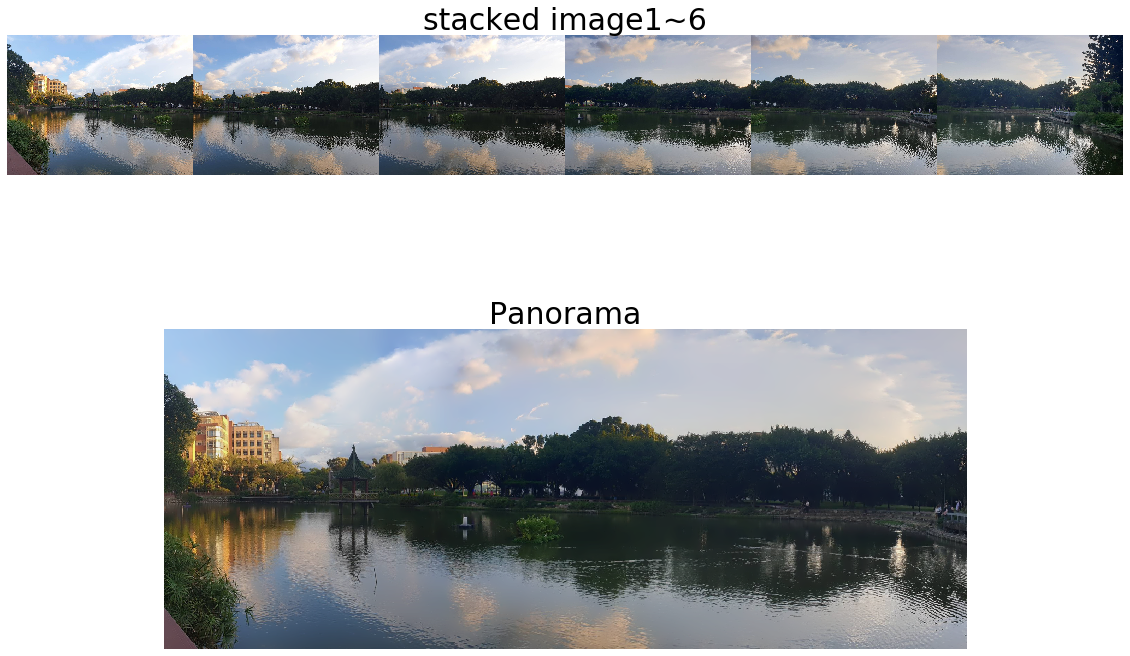

In [65]:
plt.figure(figsize=(20,20))
plt.subplot(311),plt.title("stacked image1~6",fontsize = 30),plt.imshow(stack[:,:,::-1]),plt.axis("off")
#plt.subplot(312),plt.title("draw_matches",fontsize = 15),plt.imshow(im3[:,:,::-1])
plt.subplot(312),plt.title("Panorama",fontsize = 30),plt.imshow(result[:,:,::-1]),plt.axis("off")

## Start to cut

In [50]:
pano = cv2.copyMakeBorder(pano.copy(), 100, 100, 100, 100, cv2.BORDER_CONSTANT, (0, 0, 0))

In [51]:
gray = cv2.cvtColor(pano, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)

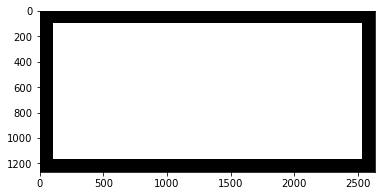

In [52]:
cnts, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt = max(cnts, key=cv2.contourArea)  # 获取最大轮廓
mask = np.zeros(thresh.shape, dtype="uint8")
x, y, w, h = cv2.boundingRect(cnt)
# 绘制最大外接矩形框（内部填充)
cv2.rectangle(mask, (x, y), (x + w, y + h), 255, -1)
plt.imshow(cv2.rectangle(mask.copy(), (x, y), (x + w, y + h), 255, -1),cmap ="gray")

In [53]:
x,y,w,h

(100, 101, 2432, 1065)

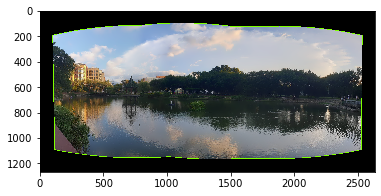

In [54]:
plt.imshow(cv2.drawContours(pano.copy(), cnts, -1, (0,255,125), 3)[:,:,::-1])

In [55]:
minRect = mask.copy()
sub = mask.copy()

#start while loop，直到sub中不再有前景像素
while cv2.countNonZero(sub) > 0:
    minRect = cv2.erode(minRect, np.ones((5,5),np.uint8))
    sub = cv2.subtract(minRect, thresh)

In [56]:
cnts, hierarchy = cv2.findContours(minRect.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt = max(cnts, key=cv2.contourArea)
# 计算最大轮廓的边界框
(x, y, w, h) = cv2.boundingRect(cnt)

In [57]:
x,y,w,h

(180, 181, 2273, 906)

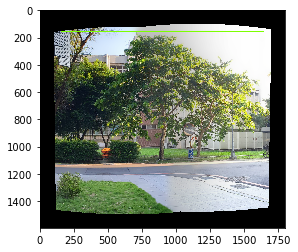

In [13]:
plt.imshow(cv2.drawContours(pano.copy(), cnts, -1, (0,255,125), 3)[:,:,::-1],cmap="gray")

In [60]:
result = pano[y:y+h,x:x+w]

In [ ]:
cv2.namedWindow("image",0)
cv2.resizeWindow("image", 1100,2500)
cv2.imshow("image",result)
cv2.waitKey(0)
cv2.destroyAllWindows() 

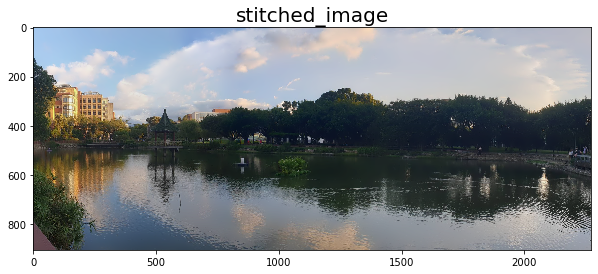

In [61]:
plt.figure(figsize=(10,10))
plt.title("stitched_image",fontsize=20)
plt.imshow(result[:,:,::-1]/255)


In [62]:
cv2.imwrite("moonlake.jpg",result)

True

In [ ]:
cv2.imwrite("stack.jpg",stack)